### (0 баллов) Считываем данные

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

dataset = load_boston()
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Каждая квартира имеет 13 признаков:

In [3]:
X = dataset['data']
X[:10]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00],
       [2.9850e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.4300e+00, 5.8700e

In [4]:
dataset['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
print(dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Хочется научиться предсказывать функцию цены квартиры. Предположительно, она зависит как-то от этих признаков.

In [6]:
y = dataset['target']
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

### (1 балл) Разделите данные на тренировочную и тестовую части.

Тестовая часть должна составлять 10% выборки.


In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

### (1 балл) Обучение и применение модели
Обучите модель линейной регрессии на тренировочной части и предскажите результаты на тестовой части.



In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = reg.predict(X_test)
y_pred.shape

(51,)

### (2 балл) Валидация результата

Напишите свою функцию MSE, убедитесь, что она совпадает с реализацией из sklearn и посчитайте своей результат на тестовой части.

In [23]:
def MSE(y_real, y_pred):
    return np.sum((y_real - y_pred)**2) / y_real.shape[0]

In [24]:
print(mean_squared_error(y_pred, y_test))
print(MSE(y_pred, y_test))

28.192564429903133
28.192564429903133


Насколько хорошо вы предсказали цену? Сравните с наивным алгоритмом (предсказать среднюю цену на тренировочной части вне зависимости от признаков).

In [26]:
y_pred

array([30.31939006, 25.19404738, 19.87295777, 19.1799523 , 33.21602026,
       19.02274726, 28.17306961, 26.12407595, 22.9258595 , 28.42716927,
       20.67390317, 32.72519398, 34.05088662, 21.06782348, 19.35805496,
       28.28923994, 13.71049756, 27.41354349, 19.21257699, 21.45419842,
       30.09438114, 19.18166485, 17.97064742, 19.17832969, 17.86308714,
       28.19847328, 35.92638617,  6.11951817, 19.99346148, 13.5855801 ,
       21.5702637 , 30.60964877, 10.17969933, 37.18354994, 24.84522127,
       25.10504042, 17.25700347, 18.20965096, 22.96327818, 12.34121053,
       21.29487522, 22.2673571 , 36.34569084, 13.49680328, 13.02559668,
        8.08846565, 17.71213395, 24.94974075, 24.37615791, 19.44389321,
       21.09005266])

In [37]:
y_pred.shape

(51,)

In [38]:
# y_naive = [np.mean(X_train)] * y_pred.shape[0]

In [39]:
y_naive = np.ones(y_pred.shape[0]) * np.mean(X_train)

In [40]:
y_naive

array([69.85755402, 69.85755402, 69.85755402, 69.85755402, 69.85755402,
       69.85755402, 69.85755402, 69.85755402, 69.85755402, 69.85755402,
       69.85755402, 69.85755402, 69.85755402, 69.85755402, 69.85755402,
       69.85755402, 69.85755402, 69.85755402, 69.85755402, 69.85755402,
       69.85755402, 69.85755402, 69.85755402, 69.85755402, 69.85755402,
       69.85755402, 69.85755402, 69.85755402, 69.85755402, 69.85755402,
       69.85755402, 69.85755402, 69.85755402, 69.85755402, 69.85755402,
       69.85755402, 69.85755402, 69.85755402, 69.85755402, 69.85755402,
       69.85755402, 69.85755402, 69.85755402, 69.85755402, 69.85755402,
       69.85755402, 69.85755402, 69.85755402, 69.85755402, 69.85755402,
       69.85755402])

In [41]:
print(mean_squared_error(y_naive, y_test))
print(MSE(y_naive, y_test))

2375.391113856525
2375.391113856525


Если я правильно понял задание, и сравнить нужно было просто с вариантом, когда стоимости каждого дома мы присваем среднюю стоимость по обучающей выборке, то результат более чем виден. В первом случае ошибка - 28, в случае наивного предсказания - 2375.

### (2 балла) Улучшите результат.

Возможно, происходит переобучение, попробуйте применить регуляризацию, чтобы улучшить результат (то есть используйте Ridge вместо LinearRegression).

Нарисуйте график зависимости MSE от коэффициента регуляризации.

In [45]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

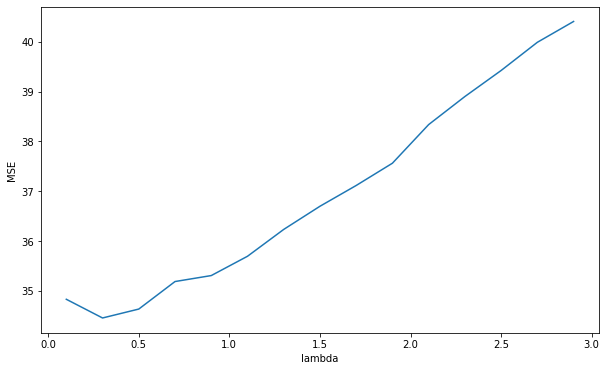

In [46]:
lambdas = np.arange(0.1, 3.0, 0.2)
lambda_errors = []

for val in lambdas:
    model = Lasso(alpha=val)
    lambda_errors.append(-np.average(cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')))

plt.figure(figsize=(10, 6))
plt.plot(lambdas, lambda_errors)
plt.ylabel('MSE')
plt.xlabel('lambda')
plt.show()

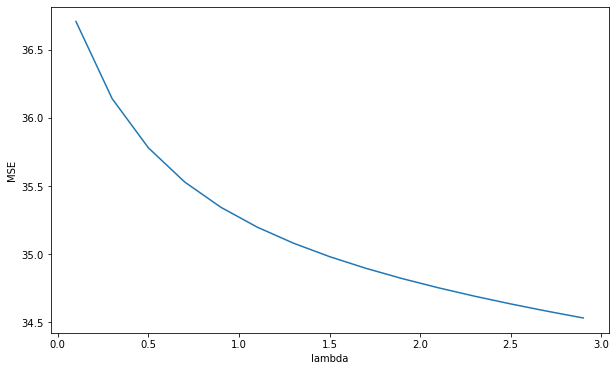

In [60]:
lambdas = np.arange(0.1, 3.0, 0.2)
lambda_errors = []

for val in lambdas:
    model = Ridge(alpha=val)
    lambda_errors.append(-np.average(cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')))

plt.figure(figsize=(10, 6))
plt.plot(lambdas, lambda_errors)
plt.ylabel('MSE')
plt.xlabel('lambda')
plt.show()

In [61]:
lambda_errors

[36.70704533649617,
 36.140158183395535,
 35.77970963344505,
 35.52922266383234,
 35.34335813223194,
 35.198265458948875,
 35.08032893355858,
 34.9812759450517,
 34.895826393086665,
 34.82047232722256,
 34.752804059948446,
 34.69111879268816,
 34.634183543037864,
 34.58108631434462,
 34.53113974360364]

In [62]:
lambda_errors.index(34.53113974360364)

14

In [79]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
MSE(y_pred, y_test)

28.192564429903133

In [80]:
model.coef_

array([-1.10616029e-01,  4.84826726e-02,  6.07551185e-03,  2.96067319e+00,
       -1.84659913e+01,  3.99294772e+00,  1.65055133e-03, -1.51218293e+00,
        2.95334611e-01, -1.17431613e-02, -9.07494511e-01,  9.58475784e-03,
       -4.83406185e-01])

In [87]:
model = Lasso(alpha=0.2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
MSE(y_pred, y_test)

27.288100309014897

In [88]:
model.coef_

array([-0.09583748,  0.05347719, -0.03890611,  0.        , -0.        ,
        3.49645705, -0.00442931, -1.16043849,  0.27218785, -0.01478853,
       -0.71594727,  0.010706  , -0.56929605])

In [91]:
model = Ridge(alpha=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
MSE(y_pred, y_test)

27.813584791216144

In [92]:
model.coef_

array([-0.10418786,  0.05129514, -0.0464044 ,  2.63339228, -5.96296319,
        3.98339298, -0.00870362, -1.33843157,  0.27033207, -0.01289889,
       -0.76203063,  0.01042921, -0.50776742])

Наглядно видно различия в подходе регуляризаций: ридж регрессия не зануляет параметры, лишь очень минимизирует их влияние.

Помогает ли регуляризация? Какой коэффициент регуляризации надо выбрать, чтобы ошибка была минимальной? Чему при этом равна ошибка? Напишите выводы о проведенных экспериментах

Регуляризация это хорошо, но что по качеству. 

Интересно заметить, что в простой модели, второй и последний параметр практически одинаковы по модулю, тогда как при регуляризации второй параметр практически занулён (причем что при L1, что при L2). Видимо это коррелирующие признаки, и регуляризация сильно уменьшив один из них улучшила "предсказательность" модели, что собственно нам и нужно. 